In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
scalable=pd.read_csv('results_scalable.csv')
print(scalable)
non_scalable = pd.read_csv('results_non_scalable.csv')

         time  number_of_points  number_of_buckets  range_of_numbers  \
0    0.430134           1000000                  4               100   
1    0.457164           1000000                  4               100   
2    0.705367           1000000                  4               100   
3    0.516455           1000000                  4               100   
4    0.441855           1000000                  4              1000   
5    0.469585           1000000                  4              1000   
6    0.728015           1000000                  4              1000   
7    0.520944           1000000                  4              1000   
8    0.453382           1000000                  4             10000   
9    0.482217           1000000                  4             10000   
10   0.750127           1000000                  4             10000   
11   0.527446           1000000                  4             10000   
12   0.650507           1000000                 20              

In [8]:
def plot(x, y, title, y_label, color):
    plt.figure(figsize=(12, 6))
    plt.xticks(x)
    plt.grid(True)
    plt.title(title)
    plt.scatter(x, y=y)
    plt.xlabel("Liczba procesów")
    plt.ylabel(y_label)
    plt.show()

In [17]:
def speedup_plot(data,points,is_scalable,description):
    t_1 = data['time'].iloc[0]
    
    if is_scalable:
        speedup = data.apply(lambda x:  t_1 * x.number_of_threads / x.time ,axis=1)
    else:
        speedup =  data.apply(lambda x: t_1 / x.time  ,axis=1)
        
    plot(
        x=data['number_of_threads'],
        y=speedup,
        title=description,
        y_label="Przyśpieszenie",
        color="red",
    )

In [9]:
def get_problem_description(is_scalable):
    if is_scalable:
        return "Problem skalowalny"
    else:
        return "Stały rozmiar problemu"

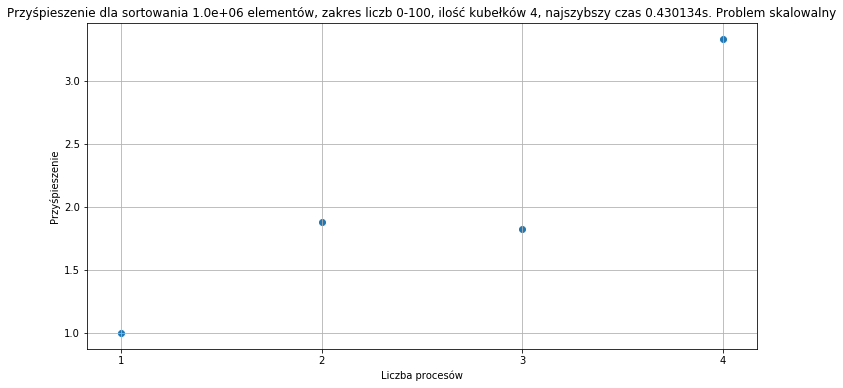

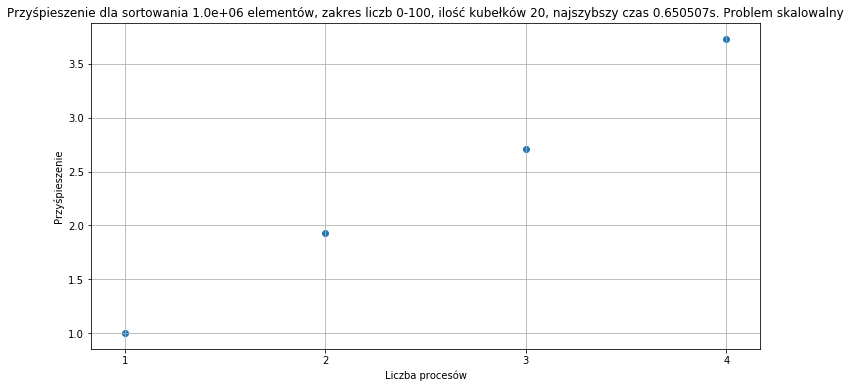

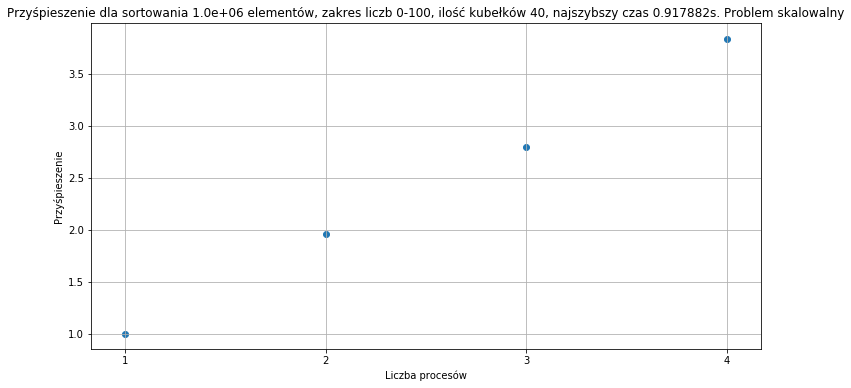

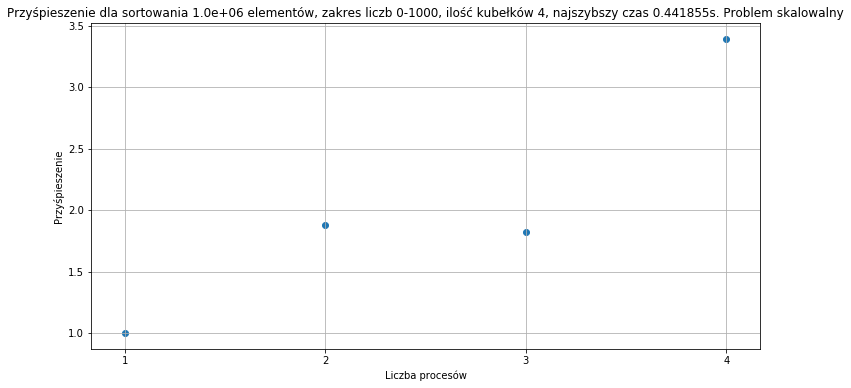

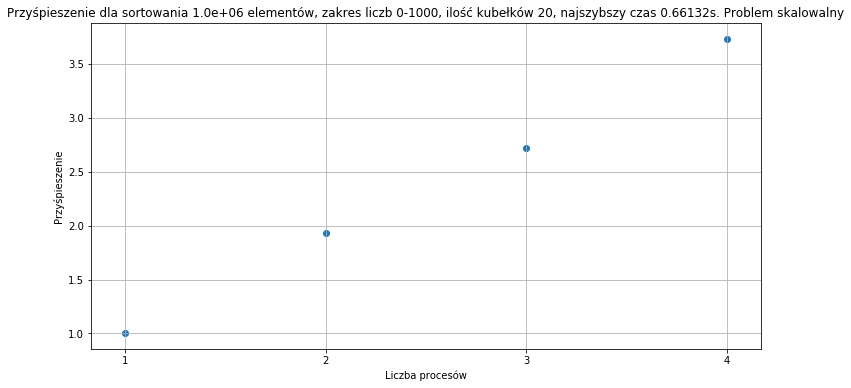

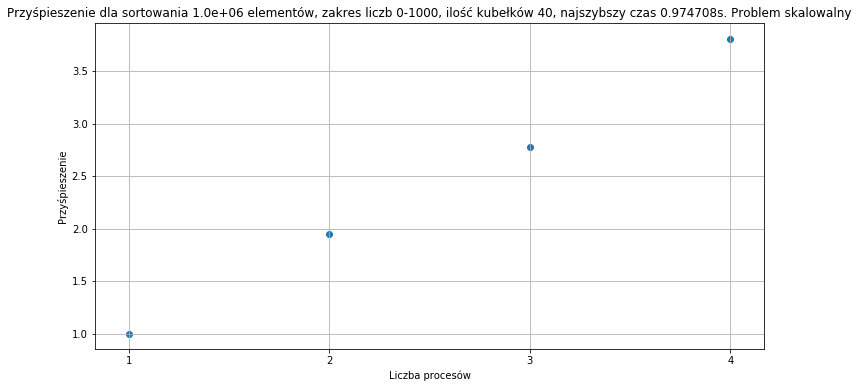

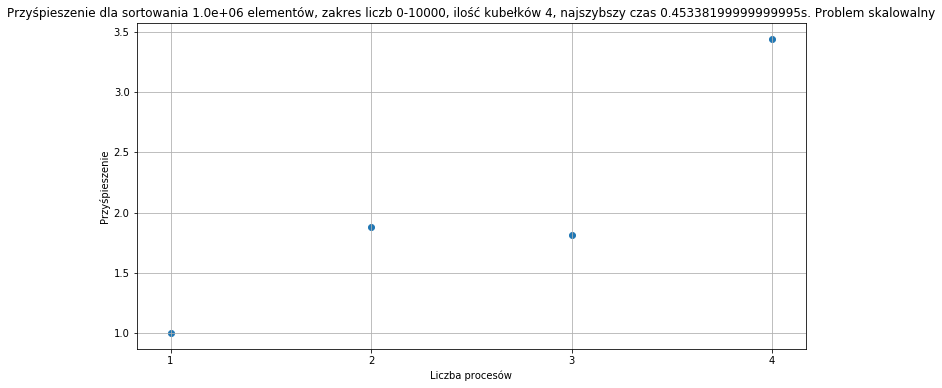

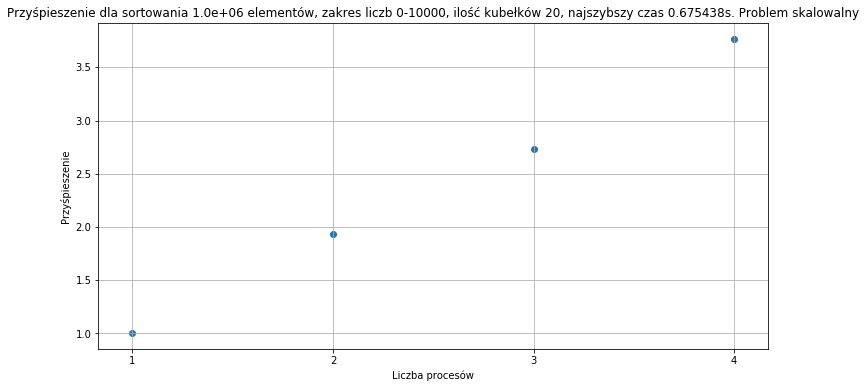

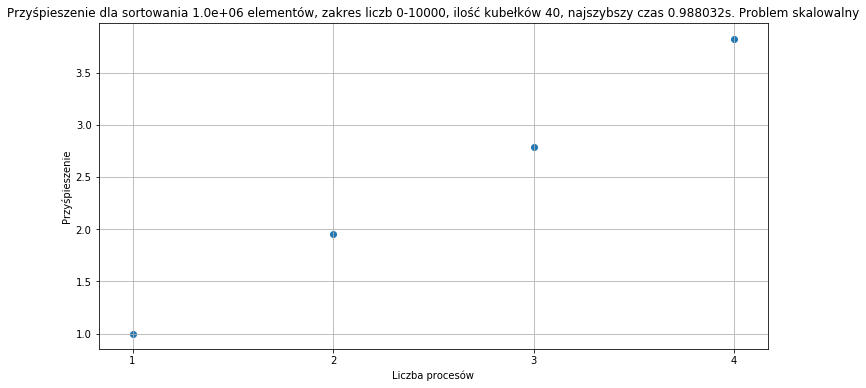

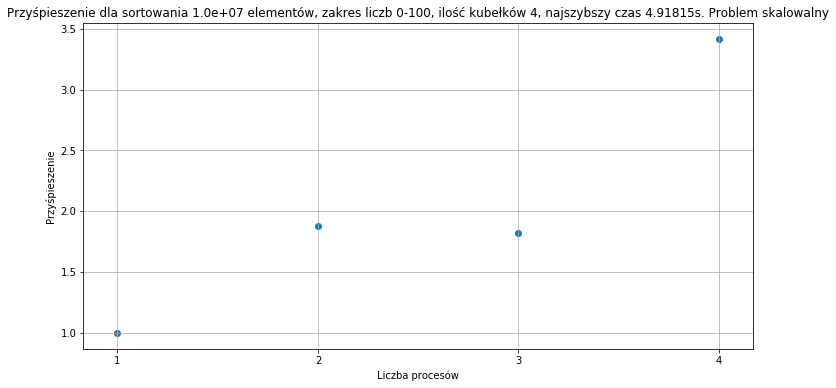

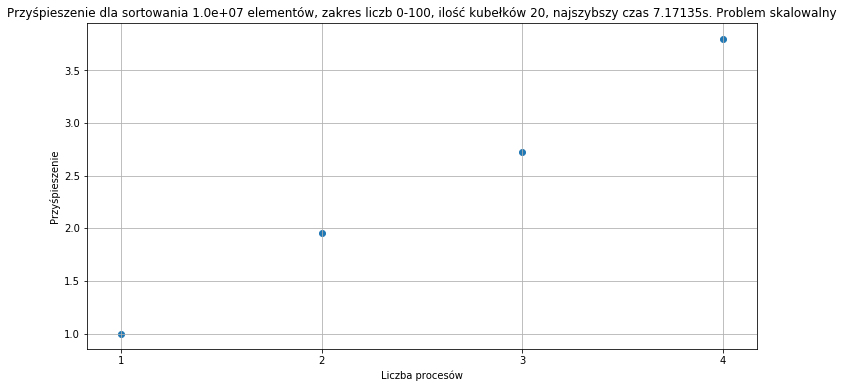

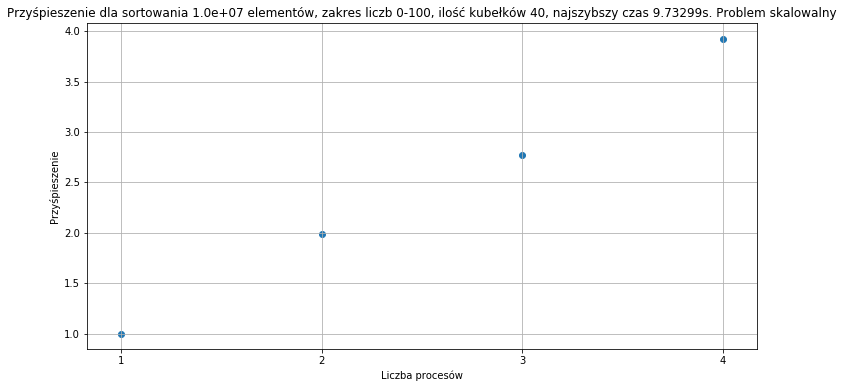

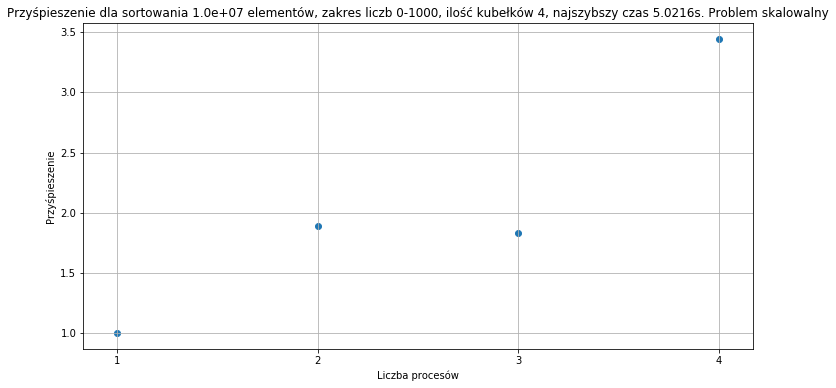

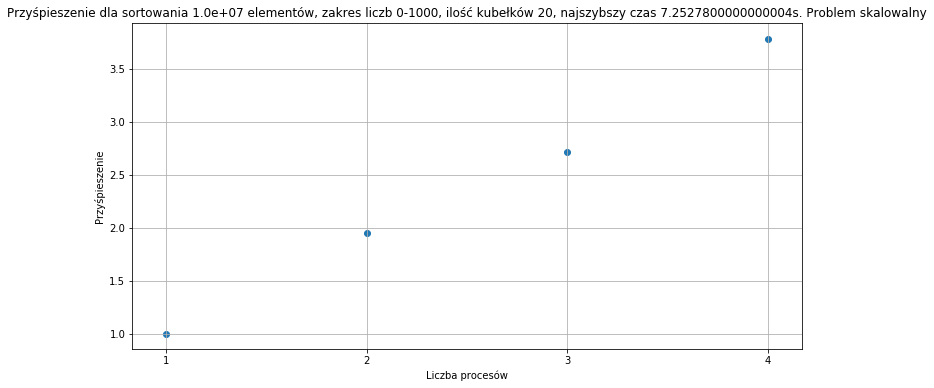

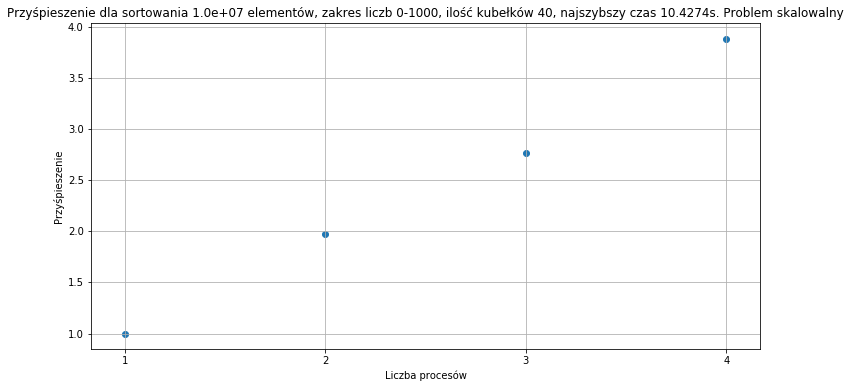

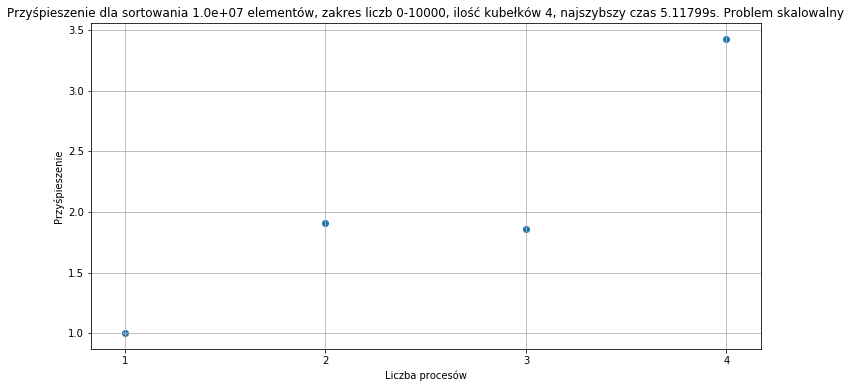

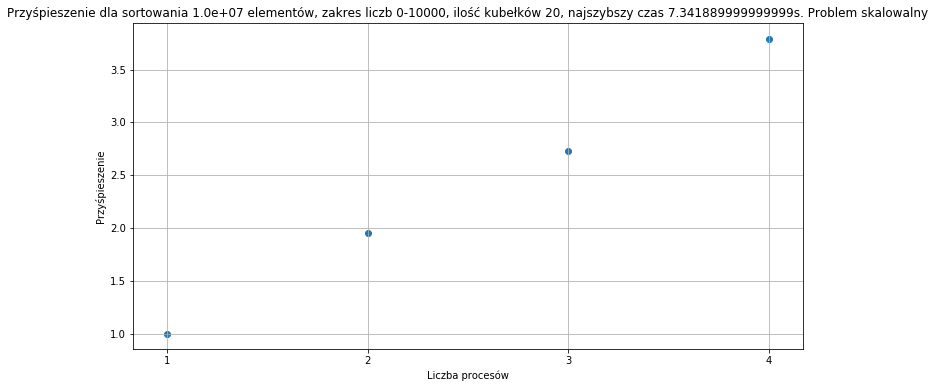

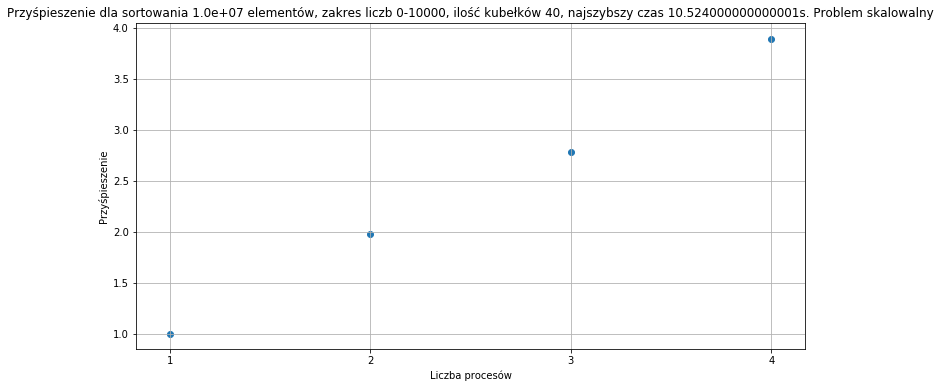

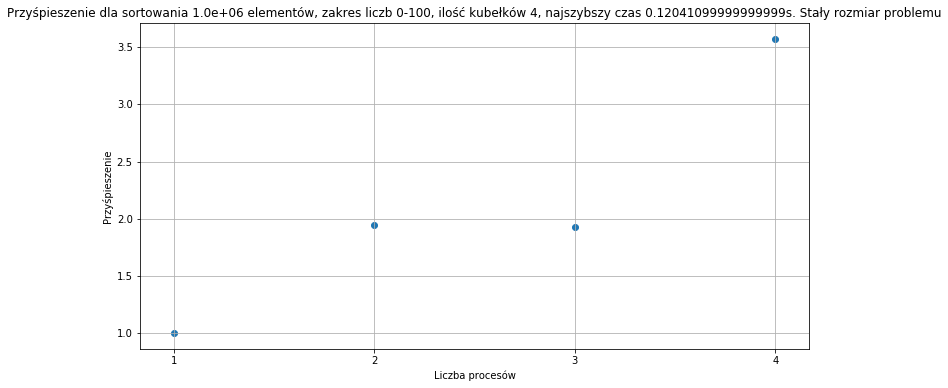

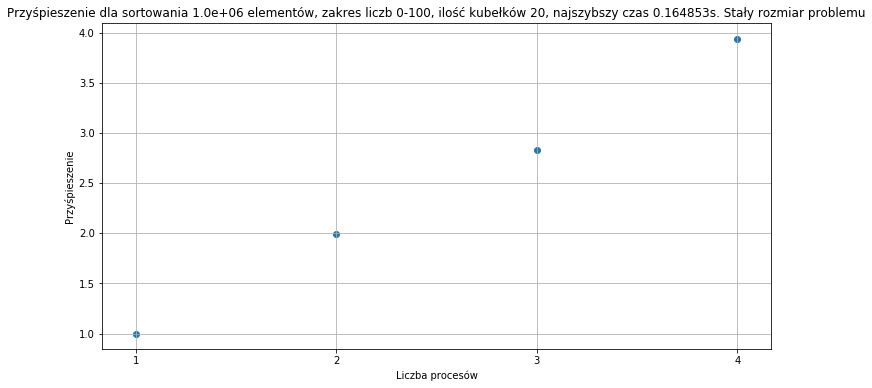

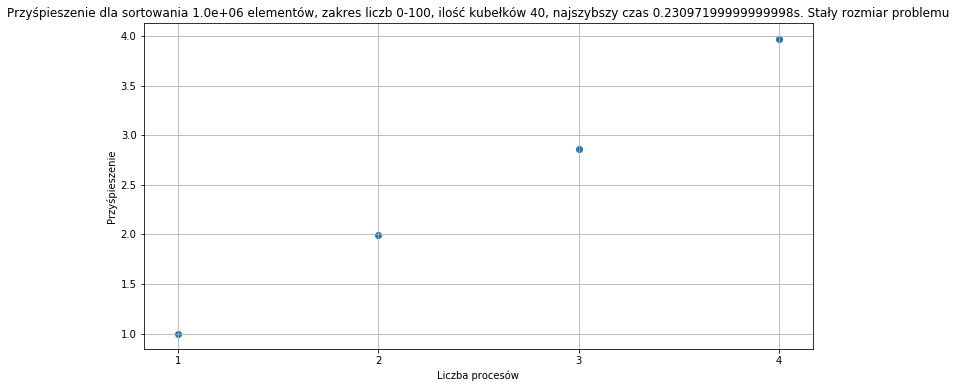

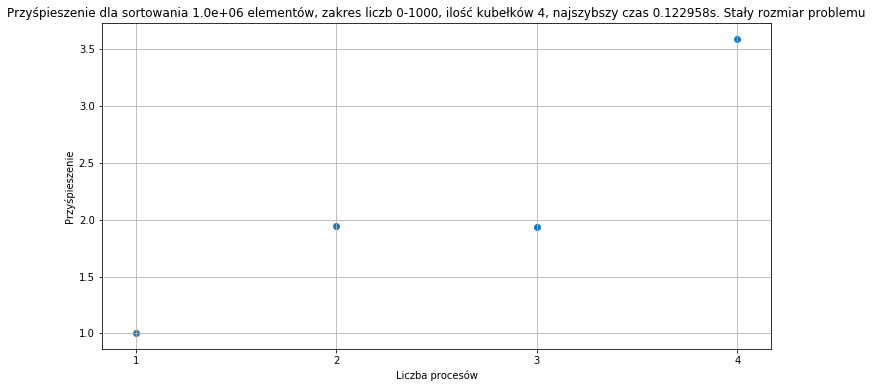

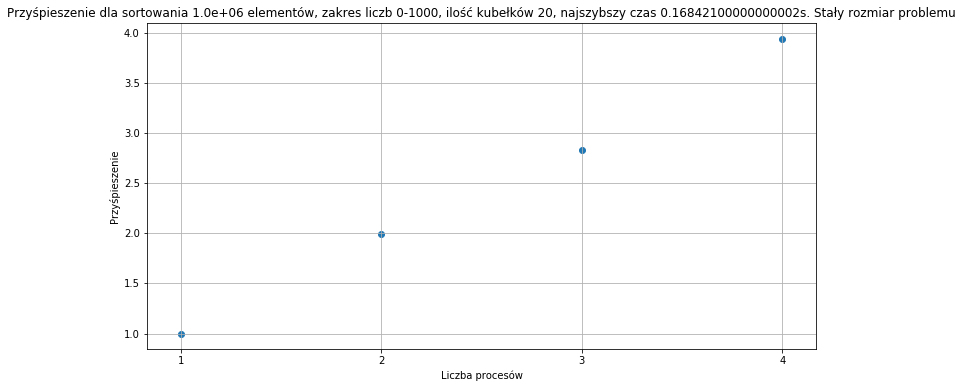

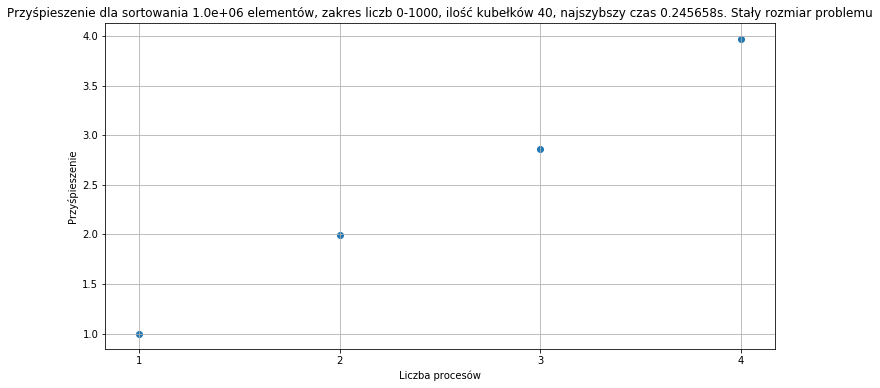

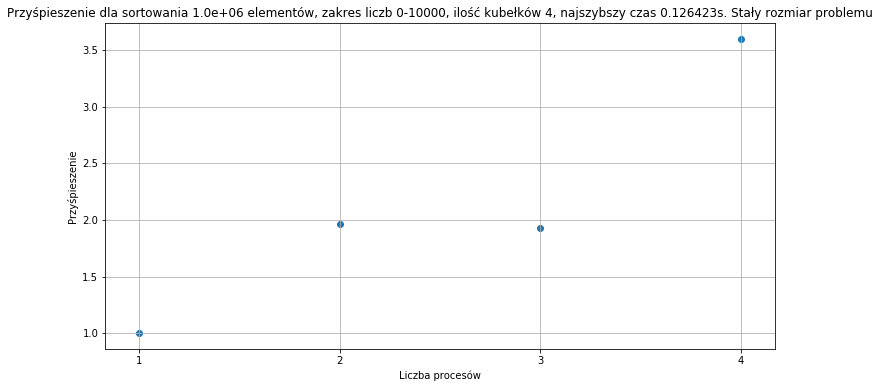

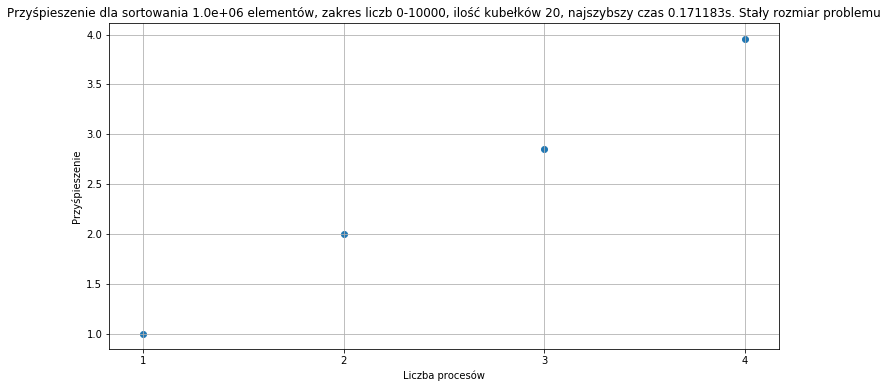

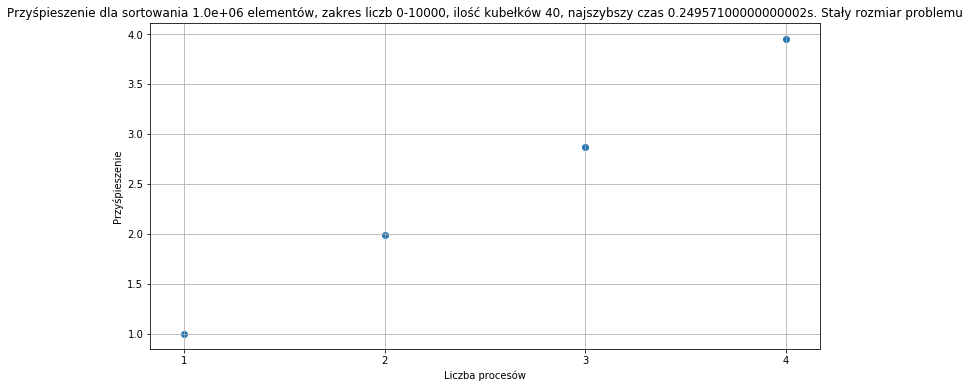

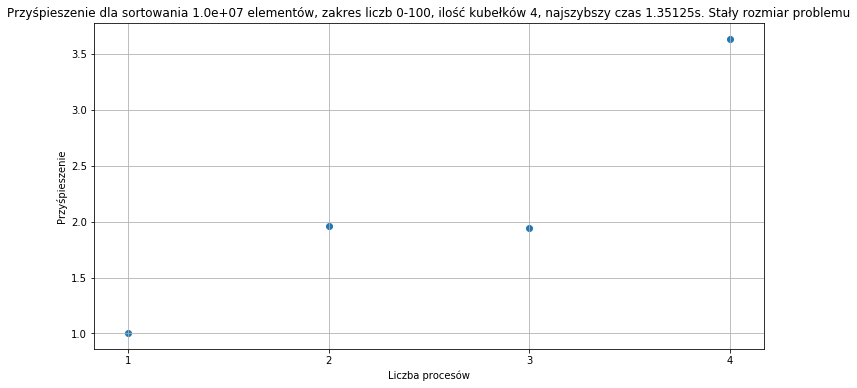

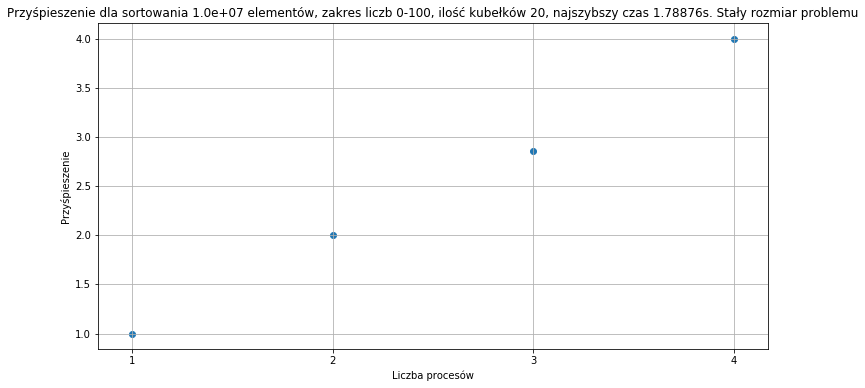

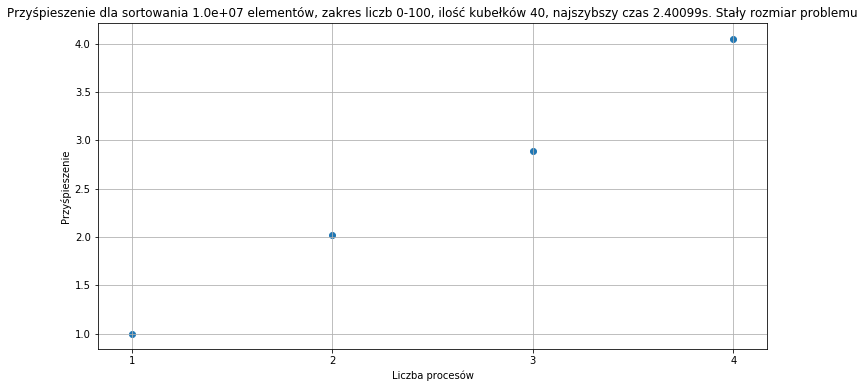

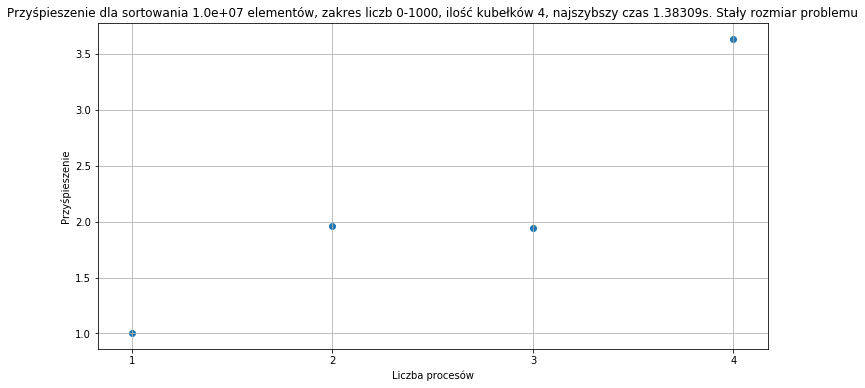

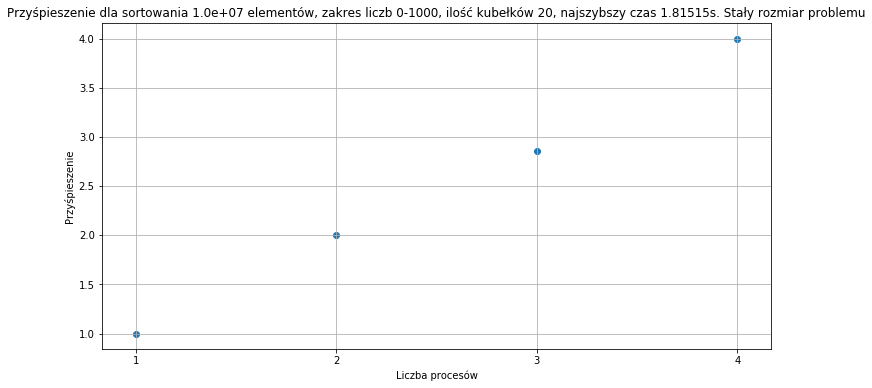

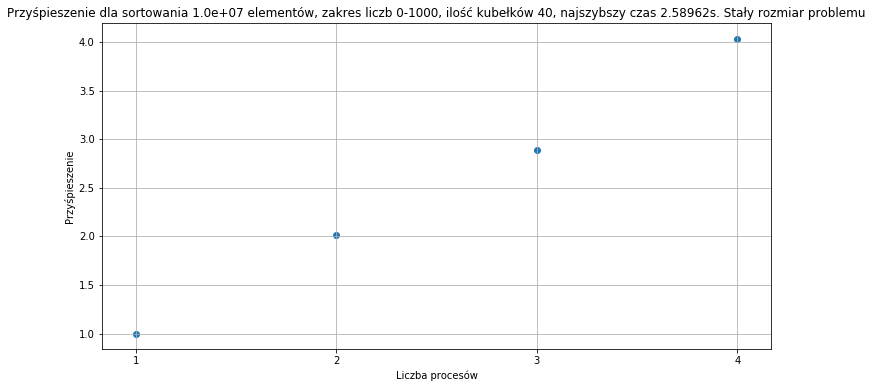

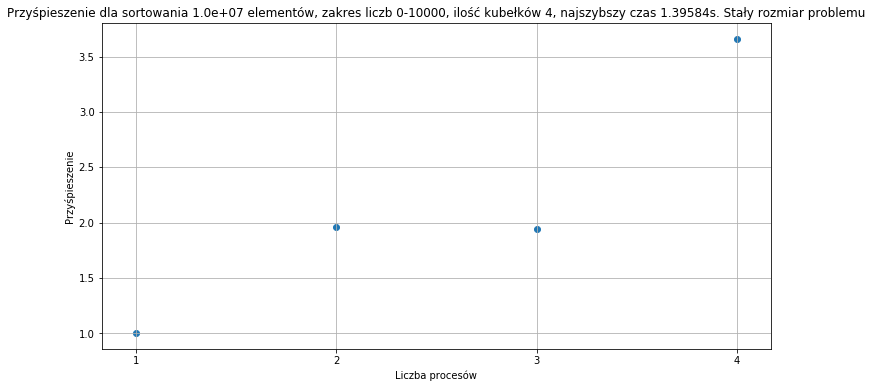

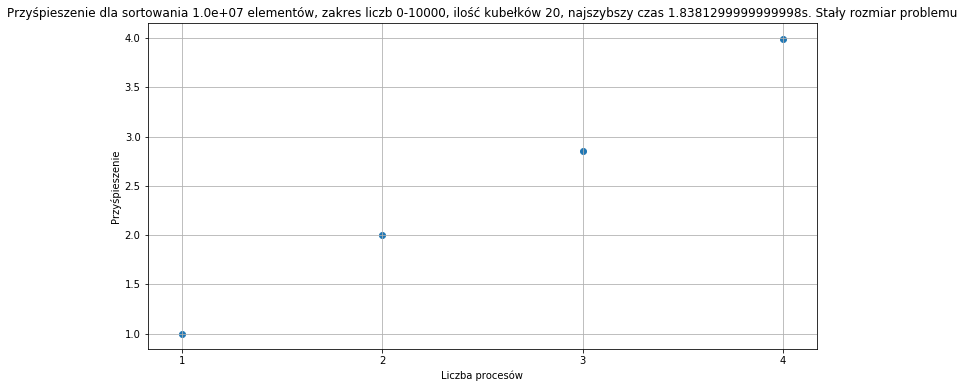

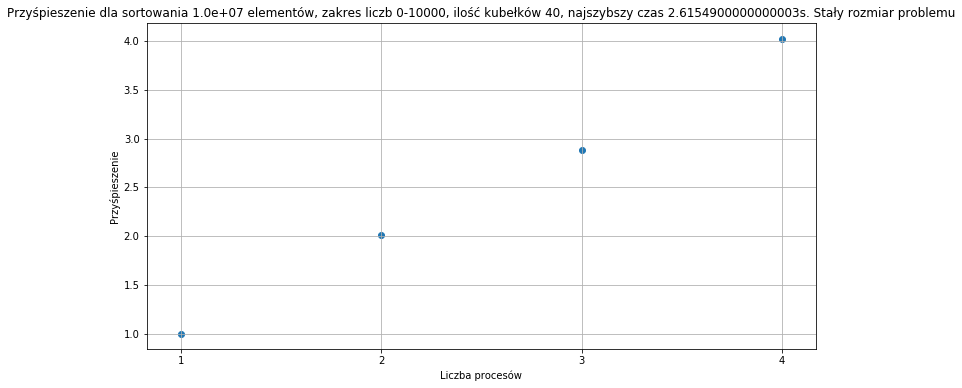

In [24]:
for problem_data in [(scalable,True),(non_scalable,False)]:
    data = problem_data[0]
    is_scalable = problem_data[1]
    for points in data.number_of_points.unique():
        for range_of_numbers in data.range_of_numbers.unique():
            for number_of_buckets in data.number_of_buckets.unique():
                query = 'number_of_points==' + str(points) + ' & number_of_buckets==' + str(number_of_buckets) + ' & range_of_numbers==' + str(range_of_numbers)
                filtered_data = data.query(query)
                description = "Przyśpieszenie dla sortowania " + "{:.1e}".format(points) + " elementów, zakres liczb 0-" +str(range_of_numbers)+", ilość kubełków "+ str(number_of_buckets)+", "+ "najszybszy czas "+str(filtered_data['time'].min())+"s. " + get_problem_description(is_scalable)
                speedup_plot(filtered_data,points,is_scalable,description)